## Extract

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub
import os
import shutil
import time
import pandas as pd
from google.colab import drive

# # Pastikan Drive sudah termount sebelum menjalankan fungsi
# drive.mount('/content/drive', force_remount=True)

def extract_etl_source1():
    """
    Fungsi untuk mengekstrak data dari sumber pertama (Kaggle: US Airbnb Open Data),
    menyimpan data mentah ke Google Drive, dan mencatat log proses.
    """

    # --- 1. Mulai Pencatatan Waktu ---
    start_time = time.time()

    # Definisi Variabel
    source_name = "kritikseth/us-airbnb-open-data"
    dest_folder_root = "/content/drive/MyDrive/bigdata_final_project/raw"
    dest_path = os.path.join(dest_folder_root, "Source1_Airbnb") # Folder spesifik untuk source 1

    print(f"[INFO] Memulai proses Extract untuk: {source_name}")

    try:
        # --- 2. Proses Download (Extract) ---
        # Download dataset ke cache lokal Colab
        cached_path = kagglehub.dataset_download(source_name)

        # --- 3. Menyimpan Data Mentah (Tanpa Transformasi) ---
        # Membuat folder tujuan jika belum ada
        if not os.path.exists(dest_folder_root):
            os.makedirs(dest_folder_root)

        # Jika folder tujuan untuk source ini sudah ada, hapus dulu agar bersih (idempotent)
        if os.path.exists(dest_path):
            shutil.rmtree(dest_path)

        # Salin seluruh folder dari cache ke Google Drive (Data Mentah)
        shutil.copytree(cached_path, dest_path)
        print(f"[INFO] Data mentah berhasil disimpan ke: {dest_path}")

        # --- 4. Mengambil Metadata untuk Log ---
        # Mencari file CSV utama untuk menghitung baris/kolom dan ukuran
        # Catatan: Kita hanya MEMBACA untuk log, tidak mengubah isinya.

        file_stats = {
            'file_name': 'Unknown',
            'rows': 0,
            'cols': 0,
            'size_mb': 0
        }

        for root, dirs, files in os.walk(dest_path):
            for file in files:
                if file.endswith(".csv"):
                    full_path = os.path.join(root, file)

                    # Hitung ukuran file
                    size_bytes = os.path.getsize(full_path)
                    file_stats['size_mb'] = round(size_bytes / (1024 * 1024), 2)
                    file_stats['file_name'] = file

                    # Hitung baris dan kolom (Hanya read, tanpa cleaning)
                    df_temp = pd.read_csv(full_path)
                    file_stats['rows'], file_stats['cols'] = df_temp.shape

                    # Hapus dataframe dari memori untuk hemat resource
                    del df_temp
                    break # Asumsi kita mengambil file csv pertama yang ditemukan

        # --- 5. Selesai & Hitung Waktu ---
        end_time = time.time()
        execution_time = round(end_time - start_time, 4)

        # --- 6. Output Log (Sesuai ketentuan poin 5) ---
        log_data = {
            "nama_sumber_data": source_name,
            "jumlah_baris": file_stats['rows'],
            "jumlah_kolom": file_stats['cols'],
            "ukuran_file": f"{file_stats['size_mb']} MB",
            "waktu_eksekusi": f"{execution_time} detik",
            "lokasi_penyimpanan": dest_path
        }

        print("\n" + "="*30)
        print("LOG PROSES EXTRACT (SOURCE 1)")
        print("="*30)
        for key, value in log_data.items():
            print(f"{key}: {value}")
        print("="*30 + "\n")

        return log_data

    except Exception as e:
        print(f"[ERROR] Terjadi kesalahan pada proses extract: {e}")
        return None

def extract_etl_source2():
    """
    Fungsi untuk mengekstrak data dari sumber kedua (Kaggle: US Airbnb Open Data),
    menyimpan data mentah ke Google Drive, dan mencatat log proses.
    """

    # --- 1. Mulai Pencatatan Waktu ---
    start_time = time.time()

    # Definisi Variabel
    source_name = "arianazmoudeh/airbnbopendata"
    dest_folder_root = "/content/drive/MyDrive/bigdata_final_project/raw"
    dest_path = os.path.join(dest_folder_root, "Source2_Airbnb") # Folder spesifik untuk source 1

    print(f"[INFO] Memulai proses Extract untuk: {source_name}")

    try:
        # --- 2. Proses Download (Extract) ---
        # Download dataset ke cache lokal Colab
        cached_path = kagglehub.dataset_download(source_name)

        # --- 3. Menyimpan Data Mentah (Tanpa Transformasi) ---
        # Membuat folder tujuan jika belum ada
        if not os.path.exists(dest_folder_root):
            os.makedirs(dest_folder_root)

        # Jika folder tujuan untuk source ini sudah ada, hapus dulu agar bersih (idempotent)
        if os.path.exists(dest_path):
            shutil.rmtree(dest_path)

        # Salin seluruh folder dari cache ke Google Drive (Data Mentah)
        shutil.copytree(cached_path, dest_path)
        print(f"[INFO] Data mentah berhasil disimpan ke: {dest_path}")

        # --- 4. Mengambil Metadata untuk Log ---
        # Mencari file CSV utama untuk menghitung baris/kolom dan ukuran
        # Catatan: Kita hanya MEMBACA untuk log, tidak mengubah isinya.

        file_stats = {
            'file_name': 'Unknown',
            'rows': 0,
            'cols': 0,
            'size_mb': 0
        }

        for root, dirs, files in os.walk(dest_path):
            for file in files:
                if file.endswith(".csv"):
                    full_path = os.path.join(root, file)

                    # Hitung ukuran file
                    size_bytes = os.path.getsize(full_path)
                    file_stats['size_mb'] = round(size_bytes / (1024 * 1024), 2)
                    file_stats['file_name'] = file

                    # Hitung baris dan kolom (Hanya read, tanpa cleaning)
                    df_temp = pd.read_csv(full_path)
                    file_stats['rows'], file_stats['cols'] = df_temp.shape

                    # Hapus dataframe dari memori untuk hemat resource
                    del df_temp
                    break # Asumsi kita mengambil file csv pertama yang ditemukan

        # --- 5. Selesai & Hitung Waktu ---
        end_time = time.time()
        execution_time = round(end_time - start_time, 4)

        # --- 6. Output Log (Sesuai ketentuan poin 5) ---
        log_data = {
            "nama_sumber_data": source_name,
            "jumlah_baris": file_stats['rows'],
            "jumlah_kolom": file_stats['cols'],
            "ukuran_file": f"{file_stats['size_mb']} MB",
            "waktu_eksekusi": f"{execution_time} detik",
            "lokasi_penyimpanan": dest_path
        }

        print("\n" + "="*30)
        print("LOG PROSES EXTRACT (SOURCE 2)")
        print("="*30)
        for key, value in log_data.items():
            print(f"{key}: {value}")
        print("="*30 + "\n")

        return log_data

    except Exception as e:
        print(f"[ERROR] Terjadi kesalahan pada proses extract: {e}")
        return None



In [ ]:
# --- Eksekusi Fungsi ---
# Jalankan fungsi ini untuk mengetes

log_source1 = extract_etl_source1()
log_source2 = extract_etl_source2()

[INFO] Memulai proses Extract untuk: kritikseth/us-airbnb-open-data


100%|██████████| 22.9M/22.9M [00:02<00:00, 10.3MB/s]

Extracting files...


[INFO] Data mentah berhasil disimpan ke: /content/drive/MyDrive/bigdata_final_project/raw/Source1_Airbnb


/tmp/ipython-input-2622894175.py:67: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(full_path)



LOG PROSES EXTRACT (SOURCE 1)
nama_sumber_data: kritikseth/us-airbnb-open-data
jumlah_baris: 226030
jumlah_kolom: 17
ukuran_file: 34.41 MB
waktu_eksekusi: 14.007 detik
lokasi_penyimpanan: /content/drive/MyDrive/bigdata_final_project/raw/Source1_Airbnb

[INFO] Memulai proses Extract untuk: arianazmoudeh/airbnbopendata


100%|██████████| 10.5M/10.5M [00:01<00:00, 6.93MB/s]

Extracting files...


[INFO] Data mentah berhasil disimpan ke: /content/drive/MyDrive/bigdata_final_project/raw/Source2_Airbnb

LOG PROSES EXTRACT (SOURCE 2)
nama_sumber_data: arianazmoudeh/airbnbopendata
jumlah_baris: 102599
jumlah_kolom: 26
ukuran_file: 34.25 MB
waktu_eksekusi: 6.0087 detik
lokasi_penyimpanan: /content/drive/MyDrive/bigdata_final_project/raw/Source2_Airbnb



/tmp/ipython-input-2622894175.py:157: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(full_path)


In [ ]:
# =====================================================
# FINAL PIPELINE: APPEND AIRBNB_OPEN_DATA KE AB_US_2020
# =====================================================
import pandas as pd

# =========================
# 1. LOAD DATASET
# =========================
ab_us = pd.read_csv("/content/drive/MyDrive/bigdata_final_project/raw/Source1_Airbnb/AB_US_2020.csv", low_memory=False)
open_data = pd.read_csv("/content/drive/MyDrive/bigdata_final_project/raw/Source2_Airbnb/Airbnb_Open_Data.csv", low_memory=False)

print("AB_US_2020 shape:", ab_us.shape)
print("Airbnb_Open_Data shape:", open_data.shape)

# =========================
# 2. DEFINISI KOLOM STANDAR
# =========================
final_columns = [
    "id",
    "name",
    "host_id",
    "host_name",
    "neighbourhood_group",
    "neighbourhood",
    "latitude",
    "longitude",
    "room_type",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "last_review",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "city"
]

# =========================
# 3. MAPPING KOLOM OPEN DATA -> AB_US
# =========================
open_to_abus_mapping = {
    "id": "id",
    "NAME": "name",
    "host id": "host_id",
    "host name": "host_name",
    "neighbourhood group": "neighbourhood_group",
    "neighbourhood": "neighbourhood",
    "lat": "latitude",
    "long": "longitude",
    "room type": "room_type",
    "price": "price",
    "minimum nights": "minimum_nights",
    "number of reviews": "number_of_reviews",
    "last review": "last_review",
    "reviews per month": "reviews_per_month",
    "calculated host listings count": "calculated_host_listings_count",
    "availability 365": "availability_365"
}

# =========================
# 4. RENAME KOLOM OPEN DATA
# =========================
open_data_renamed = open_data.rename(columns=open_to_abus_mapping)

# =========================
# 5. SAMAKAN SKEMA KOLOM
# =========================
# Tambahkan kolom yang tidak ada di Open Data (mis. city)
for col in final_columns:
    if col not in open_data_renamed.columns:
        open_data_renamed[col] = pd.NA

# Subset sesuai urutan kolom AB_US
open_data_ready = open_data_renamed[final_columns].copy()
ab_us_ready = ab_us[final_columns].copy()

print("Kolom final digunakan:", final_columns)

# =========================
# 6. HAPUS DUPLIKASI ID
# =========================
existing_ids = set(ab_us_ready["id"])
open_data_ready = open_data_ready[
    ~open_data_ready["id"].isin(existing_ids)
]

print("Baris baru dari Open Data:", open_data_ready.shape[0])

# =========================
# 7. APPEND BARIS
# =========================
final_df = pd.concat(
    [ab_us_ready, open_data_ready],
    axis=0,
    ignore_index=True
)

print("Final dataset shape:", final_df.shape)

# =========================
# 8. SIMPAN DATASET HASIL
# =========================
final_df.to_csv("/content/drive/MyDrive/bigdata_final_project/raw/merged/merged.csv", index=False)
print("Saved: merged.csv")

final_df.head()


AB_US_2020 shape: (226030, 17)
Airbnb_Open_Data shape: (102599, 26)
Kolom final digunakan: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'city']
Baris baru dari Open Data: 102200
Final dataset shape: (328230, 17)
Saved: merged.csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1.0,138.0,16/02/20,1.14,1.0,0.0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1.0,114.0,07/09/20,1.03,11.0,288.0,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30.0,89.0,30/11/19,0.81,2.0,298.0,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1.0,267.0,22/09/20,2.39,5.0,0.0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30.0,58.0,19/10/15,0.52,1.0,0.0,Asheville


## Transform


### Cleaning

Data Loaded Successfully. Shape: (328230, 17)

1. LAPORAN MISSING VALUES
                                Total Missing
neighbourhood_group                    115874
city                                   102200
last_review                             64448
reviews_per_month                       64434
availability_365                          445
host_name                                 438
minimum_nights                            408
calculated_host_listings_count            317
name                                      278
price                                     247
number_of_reviews                         182
neighbourhood                              16
longitude                                   8
latitude                                    8

2. LAPORAN DUPLIKAT
Jumlah baris duplikat penuh: 540
Jumlah ID yang duplikat: 541

3. LAPORAN OUTLIERS
Kolom 'price' telah dibersihkan sementara menjadi 'price_clean' untuk pengecekan outlier.
Memeriksa kolom: ['minimum_nights', 'number

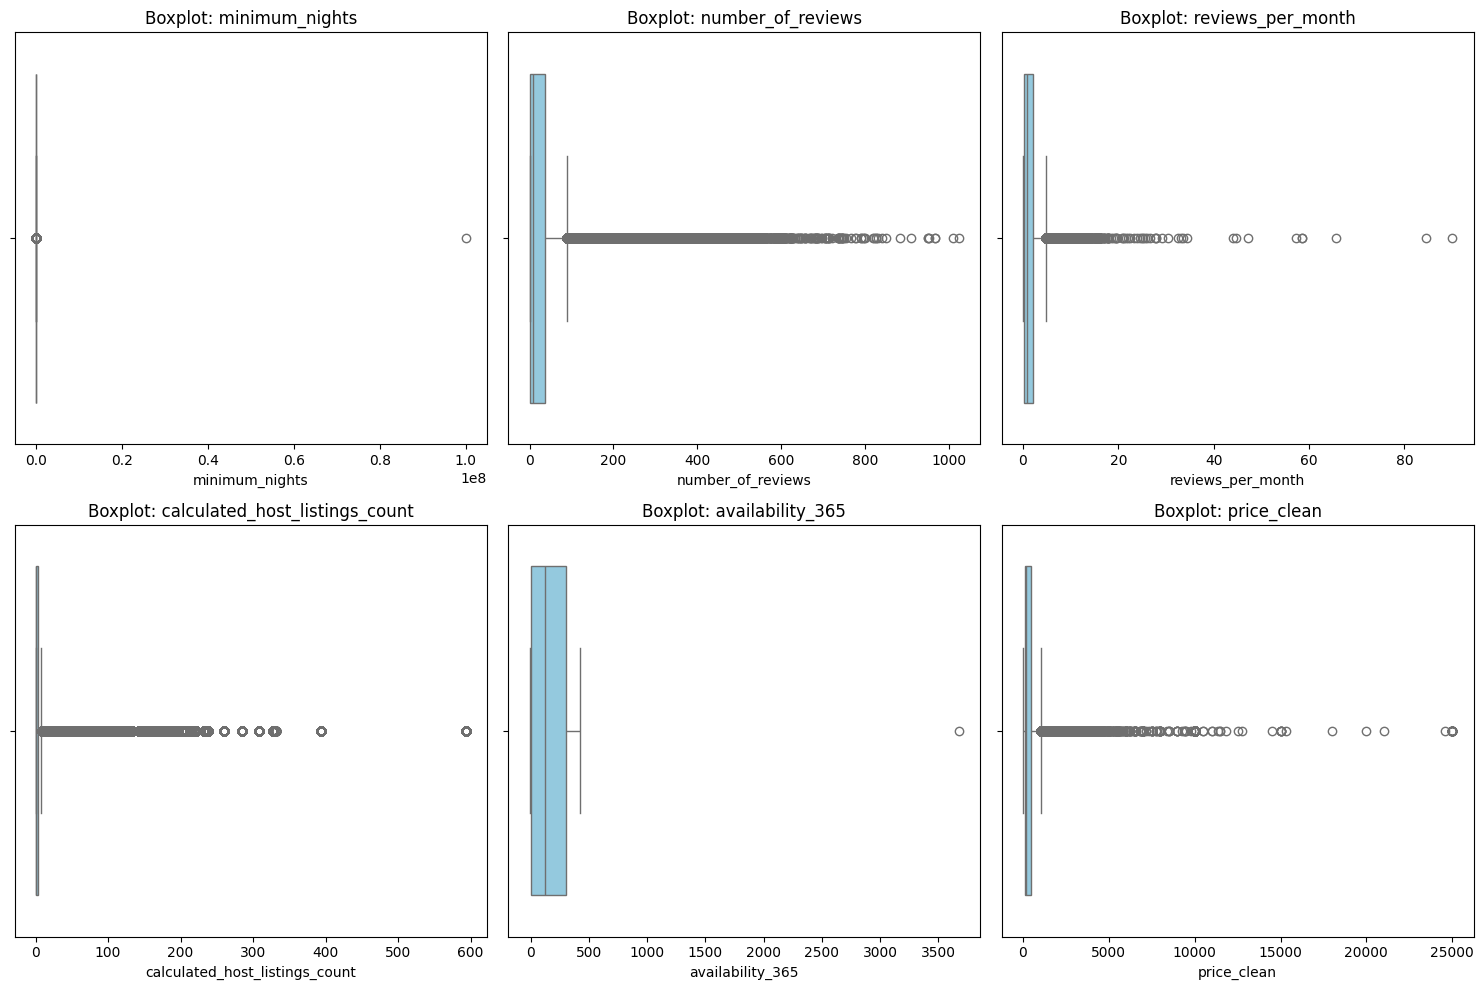

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data Merged ---
# Pastikan path ini sesuai dengan lokasi file kamu di Google Drive
file_path = "/content/drive/MyDrive/bigdata_final_project/raw/merged/merged.csv"

# Menggunakan low_memory=False karena dataset > 100k baris
try:
    df = pd.read_csv(file_path, low_memory=False)
    print(f"Data Loaded Successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di {file_path}. Pastikan drive sudah termount.")

# --- 2. Cek Missing Values ---
print("\n" + "="*40)
print("1. LAPORAN MISSING VALUES")
print("="*40)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_report = pd.DataFrame({'Total Missing': missing})
missing_report = missing_report[missing_report['Total Missing'] > 0].sort_values(by='Total Missing', ascending=False)

if not missing_report.empty:
    print(missing_report)
else:
    print("Tidak ditemukan missing values.")

# --- 3. Cek Duplikat ---
print("\n" + "="*40)
print("2. LAPORAN DUPLIKAT")
print("="*40)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat penuh: {duplicates}")

# Cek duplikat berdasarkan ID (Primary Key Check)
# Dataset kamu memiliki kolom 'id' (lowercase)
if 'id' in df.columns:
    id_duplicates = df.duplicated(subset=['id']).sum()
    print(f"Jumlah ID yang duplikat: {id_duplicates}")
elif 'ID' in df.columns:
    id_duplicates = df.duplicated(subset=['ID']).sum()
    print(f"Jumlah ID yang duplikat: {id_duplicates}")

# --- 4. Cek Outliers ---
print("\n" + "="*40)
print("3. LAPORAN OUTLIERS")
print("="*40)

# Pre-cleaning untuk kolom 'price'
# Karena ini dataset gabungan, kolom price mungkin bertipe object (ada string '$' atau ',')
if 'price' in df.columns:
    # Kita bersihkan simbol mata uang dan koma, lalu ubah ke numerik
    # Kita buat kolom baru sementara 'price_clean' agar tidak merusak kolom asli sebelum tahap transformasi
    df['price_clean'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df['price_clean'] = pd.to_numeric(df['price_clean'], errors='coerce')
    print("Kolom 'price' telah dibersihkan sementara menjadi 'price_clean' untuk pengecekan outlier.")

# Update kolom numerik yang tersedia setelah pembuatan price_clean
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Filter kolom yang tidak perlu dicek outliernya (seperti ID atau koordinat)
exclude_cols = ['id', 'ID', 'host_id', 'host id', 'latitude', 'longitude', 'lat', 'long']
check_cols = [col for col in numeric_cols if col not in exclude_cols]

outlier_cols = []
print(f"Memeriksa kolom: {check_cols}\n")

for col in check_cols:
    # Mengabaikan NaN saat menghitung kuantil agar tidak error
    series_valid = df[col].dropna()

    if len(series_valid) > 0:
        Q1 = series_valid.quantile(0.25)
        Q3 = series_valid.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung outliers
        outliers = series_valid[(series_valid < lower_bound) | (series_valid > upper_bound)]

        if len(outliers) > 0:
            outlier_cols.append(col)
            print(f"Kolom '{col}':")
            print(f"  - Jumlah Outlier: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
            print(f"  - Range Data Wajar: {lower_bound:.2f} sampai {upper_bound:.2f}")
            print(f"  - Nilai Ekstrem (Max): {series_valid.max()}")
            print("-" * 20)

# --- 5. Visualisasi Outliers ---
print("\nMembuat Visualisasi Boxplot...")
if outlier_cols:
    # Mengatur ukuran grid plot dinamis
    num_plots = len(outlier_cols)
    cols_grid = 3
    # Menghitung jumlah baris grid yang dibutuhkan
    rows_grid = (num_plots + cols_grid - 1) // cols_grid

    plt.figure(figsize=(15, 5 * rows_grid))

    for i, col in enumerate(outlier_cols):
        plt.subplot(rows_grid, cols_grid, i+1)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik dengan outlier signifikan untuk divisualisasikan.")

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Load Data ---
file_path = "/content/drive/MyDrive/bigdata_final_project/raw/merged/merged.csv"
df = pd.read_csv(file_path, low_memory=False)

print(f"BENTUK AWAL DATA: {df.shape}")

# --- 2. Drop Kolom Tidak Perlu ---
# Menghapus 'neighbourhood_group' dan 'city' sesuai permintaan
cols_to_drop = ['neighbourhood_group', 'city']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"[INFO] Kolom {cols_to_drop} berhasil dihapus.")

# --- 3. Cleaning Format & Tipe Data (PENTING sebelum Outlier Check) ---
# Kita harus pastikan price jadi angka dulu agar bisa dideteksi outlier/missing value-nya
if 'price' in df.columns:
    # Hapus simbol '$' dan ',' lalu ubah ke numerik
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df['price'] = pd.to_numeric(df['price'], errors='coerce') # Non-angka jadi NaN
    print("[INFO] Format kolom 'price' telah dibersihkan menjadi numerik.")

# --- 4. Handle Outliers ---

# A. Handle minimum_nights (Sesuai request)
# Strategi: Hapus data yang tidak masuk akal (> 365 hari atau <= 0)
before_count = len(df)
df = df[(df['minimum_nights'] > 0) & (df['minimum_nights'] <= 365)]
print(f"[CLEANING] minimum_nights: {before_count - len(df)} baris data tidak wajar dihapus.")

# B. Handle availability_365 (Saran Tambahan)
# Menghapus nilai mustahil (< 0 atau > 365)
before_count = len(df)
df = df[(df['availability_365'] >= 0) & (df['availability_365'] <= 365)]
print(f"[CLEANING] availability_365: {before_count - len(df)} baris data mustahil dihapus.")

# --- 5. Handle Duplikat ---
# Drop duplikat berdasarkan 'id' (Primary Key) untuk memastikan unik
before_count = len(df)
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
print(f"[CLEANING] Duplikat ID: {before_count - len(df)} baris duplikat dihapus.")

# --- 6. Handle Missing Values ---
# Drop semua baris yang masih punya setidaknya satu missing value
before_count = len(df)
df.dropna(inplace=True)
print(f"[CLEANING] Missing Values: {before_count - len(df)} baris dengan data kosong dihapus.")

# --- 7. Final Check & Save ---
print("\n" + "="*30)
print("HASIL AKHIR CLEANING")
print("="*30)
print(f"Jumlah Baris Akhir: {df.shape[0]}")
print(f"Jumlah Kolom Akhir: {df.shape[1]}")
print("\nStatistik Ringkas Kolom Numerik Utama:")
print(df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe().round(2))

# Simpan hasil cleaning
output_path = "/content/drive/MyDrive/bigdata_final_project/raw/merged/merged_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n[SUCCESS] Data bersih disimpan ke: {output_path}")

BENTUK AWAL DATA: (328230, 17)
[INFO] Kolom ['neighbourhood_group', 'city'] berhasil dihapus.
[INFO] Format kolom 'price' telah dibersihkan menjadi numerik.
[CLEANING] minimum_nights: 521 baris data tidak wajar dihapus.
[CLEANING] availability_365: 3601 baris data mustahil dihapus.
[CLEANING] Duplikat ID: 503 baris duplikat dihapus.
[CLEANING] Missing Values: 64492 baris dengan data kosong dihapus.

HASIL AKHIR CLEANING
Jumlah Baris Akhir: 259113
Jumlah Kolom Akhir: 15

Statistik Ringkas Kolom Numerik Utama:
           price  minimum_nights  number_of_reviews  availability_365
count  259113.00       259113.00          259113.00         259113.00
mean      323.89            8.14              40.20            150.92
std       450.07           17.78              64.15            135.52
min         0.00            1.00               1.00              0.00
25%        89.00            1.00               4.00              3.00
50%       165.00            2.00              14.00            123

Data Loaded Successfully. Shape: (259113, 15)

1. LAPORAN MISSING VALUES
Tidak ditemukan missing values.

2. LAPORAN DUPLIKAT
Jumlah baris duplikat penuh: 0
Jumlah ID yang duplikat: 0

3. LAPORAN OUTLIERS
Memeriksa kolom: ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Kolom 'price':
  - Jumlah Outlier: 19390 (7.48%)
  - Range Data Wajar: -436.00 sampai 964.00
  - Nilai Ekstrem (Max): 24999.0
--------------------
Kolom 'minimum_nights':
  - Jumlah Outlier: 46143 (17.81%)
  - Range Data Wajar: -5.00 sampai 11.00
  - Nilai Ekstrem (Max): 365.0
--------------------
Kolom 'number_of_reviews':
  - Jumlah Outlier: 24512 (9.46%)
  - Range Data Wajar: -63.50 sampai 116.50
  - Nilai Ekstrem (Max): 1024.0
--------------------
Kolom 'reviews_per_month':
  - Jumlah Outlier: 12733 (4.91%)
  - Range Data Wajar: -2.50 sampai 4.78
  - Nilai Ekstrem (Max): 90.0
--------------------
Kolom 'calculated_host_listings_count':
  - J

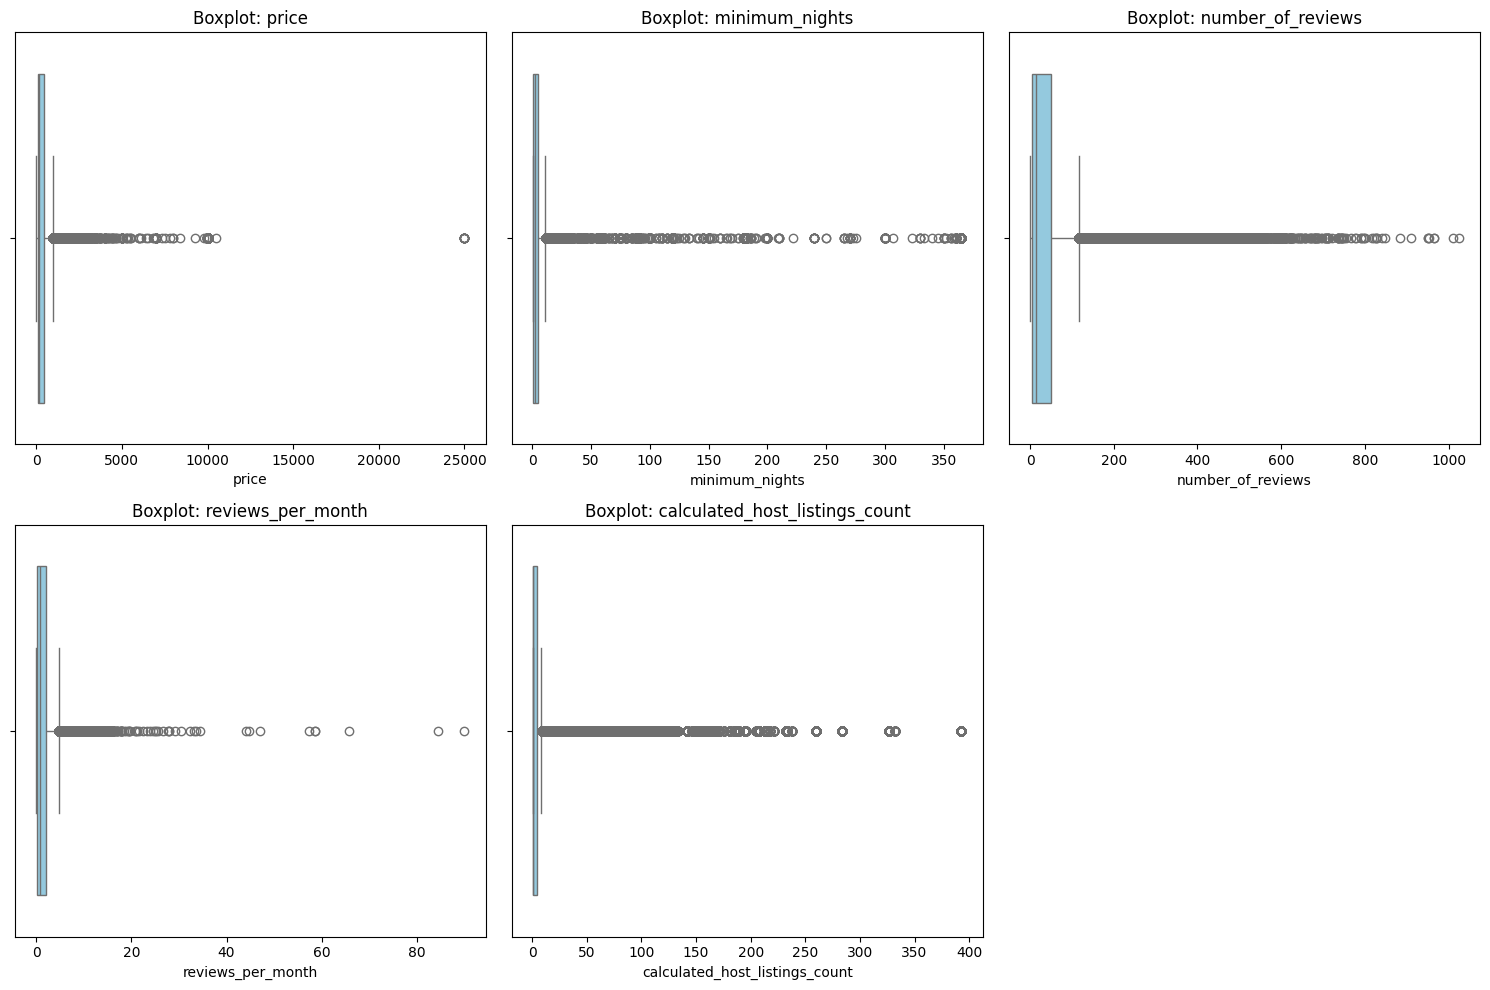

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data Merged ---
# Pastikan path ini sesuai dengan lokasi file kamu di Google Drive
file_path = "/content/drive/MyDrive/bigdata_final_project/raw/merged/merged_cleaned.csv"

# Menggunakan low_memory=False karena dataset > 100k baris
try:
    df = pd.read_csv(file_path, low_memory=False)
    print(f"Data Loaded Successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di {file_path}. Pastikan drive sudah termount.")

# --- 2. Cek Missing Values ---
print("\n" + "="*40)
print("1. LAPORAN MISSING VALUES")
print("="*40)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_report = pd.DataFrame({'Total Missing': missing})
missing_report = missing_report[missing_report['Total Missing'] > 0].sort_values(by='Total Missing', ascending=False)

if not missing_report.empty:
    print(missing_report)
else:
    print("Tidak ditemukan missing values.")

# --- 3. Cek Duplikat ---
print("\n" + "="*40)
print("2. LAPORAN DUPLIKAT")
print("="*40)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat penuh: {duplicates}")

# Cek duplikat berdasarkan ID (Primary Key Check)
# Dataset kamu memiliki kolom 'id' (lowercase)
if 'id' in df.columns:
    id_duplicates = df.duplicated(subset=['id']).sum()
    print(f"Jumlah ID yang duplikat: {id_duplicates}")
elif 'ID' in df.columns:
    id_duplicates = df.duplicated(subset=['ID']).sum()
    print(f"Jumlah ID yang duplikat: {id_duplicates}")

# --- 4. Cek Outliers ---
print("\n" + "="*40)
print("3. LAPORAN OUTLIERS")
print("="*40)

# Update kolom numerik yang tersedia setelah pembuatan price_clean
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Filter kolom yang tidak perlu dicek outliernya (seperti ID atau koordinat)
exclude_cols = ['id', 'ID', 'host_id', 'host id', 'latitude', 'longitude', 'lat', 'long']
check_cols = [col for col in numeric_cols if col not in exclude_cols]

outlier_cols = []
print(f"Memeriksa kolom: {check_cols}\n")

for col in check_cols:
    # Mengabaikan NaN saat menghitung kuantil agar tidak error
    series_valid = df[col].dropna()

    if len(series_valid) > 0:
        Q1 = series_valid.quantile(0.25)
        Q3 = series_valid.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung outliers
        outliers = series_valid[(series_valid < lower_bound) | (series_valid > upper_bound)]

        if len(outliers) > 0:
            outlier_cols.append(col)
            print(f"Kolom '{col}':")
            print(f"  - Jumlah Outlier: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
            print(f"  - Range Data Wajar: {lower_bound:.2f} sampai {upper_bound:.2f}")
            print(f"  - Nilai Ekstrem (Max): {series_valid.max()}")
            print("-" * 20)

# --- 5. Visualisasi Outliers ---
print("\nMembuat Visualisasi Boxplot...")
if outlier_cols:
    # Mengatur ukuran grid plot dinamis
    num_plots = len(outlier_cols)
    cols_grid = 3
    # Menghitung jumlah baris grid yang dibutuhkan
    rows_grid = (num_plots + cols_grid - 1) // cols_grid

    plt.figure(figsize=(15, 5 * rows_grid))

    for i, col in enumerate(outlier_cols):
        plt.subplot(rows_grid, cols_grid, i+1)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik dengan outlier signifikan untuk divisualisasikan.")

### Split Dataset

In [ ]:
import pandas as pd
import numpy as np
import os

# Paths
INPUT_CSV = "/content/drive/MyDrive/bigdata_final_project/raw/merged/merged_cleaned.csv"   # file terlampir
OUT_DIR = "/content/drive/MyDrive/bigdata_final_project/raw/split_dataset"
os.makedirs(OUT_DIR, exist_ok=True)

# Read dataset (try common encodings)
print("Membaca dataset dari:", INPUT_CSV)
df = pd.read_csv(INPUT_CSV, low_memory=False)

# --- Basic sanity and info ---
print("Initial shape:", df.shape)
print("Columns:", list(df.columns))

# --- Standardize column names (optional but helpful) ---
df.columns = [c.strip() for c in df.columns]

# --- Convert/clean common columns ---
# 1) Ensure ID columns numeric where expected
if 'id' in df.columns:
    df['id'] = pd.to_numeric(df['id'], errors='coerce').astype('Int64')
if 'host_id' in df.columns:
    df['host_id'] = pd.to_numeric(df['host_id'], errors='coerce').astype('Int64')

# 2) Numeric columns
numeric_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month',
                'calculated_host_listings_count','availability_365','latitude','longitude']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',',''), errors='coerce')

# 3) last_review -> datetime
if 'last_review' in df.columns:
    # data shows day/month/year formats like "16/02/20" -> use dayfirst True
    df['last_review'] = pd.to_datetime(df['last_review'], dayfirst=True, errors='coerce')

# --- Drop exact duplicate rows (optional) ---
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Dropped exact duplicate rows: {before-after}")

# --- Define the three datasets ---

# 1) Dimension: Property (static listing info / geographic)
dim_property_cols = ['id','name','neighbourhood','latitude','longitude','room_type']
dim_property = df[[c for c in dim_property_cols if c in df.columns]].drop_duplicates(subset=['id'] if 'id' in df.columns else None)
# Optional: fill small missing coordinates with NaN (already numeric)
# Ensure id is not null for dimension primary key
if 'id' in dim_property.columns:
    dim_property = dim_property[dim_property['id'].notna()]

# 2) Dimension: Host (host-level static info)
dim_host_cols = ['host_id','host_name','calculated_host_listings_count']
dim_host = df[[c for c in dim_host_cols if c in df.columns]].drop_duplicates(subset=['host_id'] if 'host_id' in df.columns else None)
if 'host_id' in dim_host.columns:
    dim_host = dim_host[dim_host['host_id'].notna()]

# 3) Fact: Listing performance (metrics + temporal)
fact_cols = ['id','host_id','price','minimum_nights','number_of_reviews',
             'reviews_per_month','availability_365','last_review']
fact_listing = df[[c for c in fact_cols if c in df.columns]].copy()
# Remove rows with missing primary id if exists
if 'id' in fact_listing.columns:
    fact_listing = fact_listing[fact_listing['id'].notna()]

# De-duplicate fact by (id) keeping latest last_review if duplicates exist
if 'id' in fact_listing.columns:
    if 'last_review' in fact_listing.columns:
        fact_listing = fact_listing.sort_values('last_review').drop_duplicates(subset=['id'], keep='last')
    else:
        fact_listing = fact_listing.drop_duplicates(subset=['id'])

# --- Save files ---
out_paths = {}
# CSV + parquet for each
def save_df(name, df_obj):
    csv_path = os.path.join(OUT_DIR, f"{name}.csv")
    pq_path = os.path.join(OUT_DIR, f"{name}.parquet")
    df_obj.to_csv(csv_path, index=False)
    try:
        df_obj.to_parquet(pq_path, index=False)
    except Exception as e:
        print("Parquet save failed (pyarrow not available?)", e)
    out_paths[name] = {"csv": csv_path, "parquet": pq_path}

save_df("dim_property", dim_property)
save_df("dim_host", dim_host)
save_df("fact_listing_performance", fact_listing)

# --- Summary outputs ---
print("\nSaved files to:", OUT_DIR)
for k,v in out_paths.items():
    print(f" - {k}: csv -> {v['csv']}, parquet -> {v['parquet']}")
print("\nShapes:")
print("dim_property:", dim_property.shape)
print("dim_host:", dim_host.shape)
print("fact_listing_performance:", fact_listing.shape)

# Show head samples
print("\nSample dim_property:")
display(dim_property.head(3))
print("\nSample dim_host:")
display(dim_host.head(3))
print("\nSample fact_listing_performance:")
display(fact_listing.head(3))

Membaca dataset dari: /content/drive/MyDrive/bigdata_final_project/raw/merged/merged_cleaned.csv
Initial shape: (259113, 15)
Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


/tmp/ipython-input-950620274.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = pd.to_datetime(df['last_review'], dayfirst=True, errors='coerce')


Dropped exact duplicate rows: 0

Saved files to: /content/drive/MyDrive/bigdata_final_project/raw/split_dataset
 - dim_property: csv -> /content/drive/MyDrive/bigdata_final_project/raw/split_dataset/dim_property.csv, parquet -> /content/drive/MyDrive/bigdata_final_project/raw/split_dataset/dim_property.parquet
 - dim_host: csv -> /content/drive/MyDrive/bigdata_final_project/raw/split_dataset/dim_host.csv, parquet -> /content/drive/MyDrive/bigdata_final_project/raw/split_dataset/dim_host.parquet
 - fact_listing_performance: csv -> /content/drive/MyDrive/bigdata_final_project/raw/split_dataset/fact_listing_performance.csv, parquet -> /content/drive/MyDrive/bigdata_final_project/raw/split_dataset/fact_listing_performance.parquet

Shapes:
dim_property: (259113, 6)
dim_host: (189770, 3)
fact_listing_performance: (259113, 8)

Sample dim_property:


,id,name,neighbourhood,latitude,longitude,room_type
0,38585,Charming Victorian home - twin beds + breakfast,28804,35.65146,-82.62792,Private room
1,80905,French Chic Loft,28801,35.59779,-82.55540,Entire home/apt
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,28801,35.60670,-82.55563,Entire home/apt



Sample dim_host:


,host_id,host_name,calculated_host_listings_count
0,165529,Evelyne,1.0
1,427027,Celeste,11.0
2,320564,Lisa,2.0



Sample fact_listing_performance:


,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review
56343,14337,56327,95.0,2.0,1.0,0.01,365.0,2010-03-28
1992,78422,421002,65.0,1.0,1.0,0.01,89.0,2011-03-17
91952,81739,417504,249.0,3.0,2.0,0.02,238.0,2011-05-12


### Standarisasi

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import RobustScaler, LabelEncoder

#  KONFIGURASI PATH
INPUT_DIR = "/content/drive/MyDrive/bigdata_final_project/raw/split_dataset"
OUTPUT_DIR = "/content/drive/MyDrive/bigdata_final_project/raw/standarisasi"

# Buat folder output jika belum ada
os.makedirs(OUTPUT_DIR, exist_ok=True)

#  FUNGSI BANTUAN
def to_snake_case(df_input):
    """Mengubah nama kolom menjadi format snake_case (huruf kecil & underscore)."""
    df_temp = df_input.copy()
    df_temp.columns = df_temp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)
    return df_temp

#  0. LOAD DATASET (MEMBACA INPUT)
print("\n MEMUAT DATASET DARI INPUT DIR ")
try:
    dim_property = pd.read_csv(os.path.join(INPUT_DIR, "dim_property.csv"))
    dim_host = pd.read_csv(os.path.join(INPUT_DIR, "dim_host.csv"))

    fact_path = os.path.join(INPUT_DIR, "fact_listing_performance.csv")
    if not os.path.exists(fact_path):
        fact_path = os.path.join(INPUT_DIR, "fact_listing.csv")

    fact_listing = pd.read_csv(fact_path)
    print("Semua file berhasil dimuat.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    raise

#  1. TRANSFORMASI: DIM_PROPERTY
print("\n [1] PROSES DIM_PROPERTY ")

dim_property_clean = to_snake_case(dim_property)

# Encoding Data Kategorikal (room_type)
if 'room_type' in dim_property_clean.columns:
    le_room = LabelEncoder()
    dim_property_clean['room_type_encoded'] = le_room.fit_transform(dim_property_clean['room_type'])

    mapping_room = dict(zip(le_room.classes_, le_room.transform(le_room.classes_)))
    print(f"Encoding 'room_type' selesai. Mapping: {mapping_room}")

#  2. TRANSFORMASI: DIM_HOST
print("\n [2] PROSES DIM_HOST ")
dim_host_clean = to_snake_case(dim_host)
print("Standardisasi nama kolom dim_host selesai.")

#  3. TRANSFORMASI: FACT_LISTING (MENGGUNAKAN ROBUST SCALER)
print("\n [3] PROSES FACT_LISTING ")

fact_listing_clean = to_snake_case(fact_listing)

# Inisialisasi Robust Scaler
robust_scaler = RobustScaler()

# Normalisasi Price (Tetap menggunakan nama 'price_norm')
if 'price' in fact_listing_clean.columns:
    fact_listing_clean['price_norm'] = robust_scaler.fit_transform(fact_listing_clean[['price']])
    print("Normalisasi 'price' (Robust Scaler) selesai -> kolom 'price_norm' dibuat.")

# Normalisasi Number of Reviews (Tetap menggunakan nama 'number_of_reviews_norm')
if 'number_of_reviews' in fact_listing_clean.columns:
    fact_listing_clean['number_of_reviews_norm'] = robust_scaler.fit_transform(fact_listing_clean[['number_of_reviews']])
    print("Normalisasi 'number_of_reviews' (Robust Scaler) selesai -> kolom 'number_of_reviews_norm' dibuat.")

print("Preview Hasil Fact_Listing:")
# Menampilkan kolom dengan nama sesuai request Anda
cols_view = ['id', 'price', 'price_norm', 'number_of_reviews', 'number_of_reviews_norm']
print(fact_listing_clean[cols_view].head(5))

#  4. PENYIMPANAN (SAVE KE OUTPUT DIR)
print("\n [4] MENYIMPAN HASIL STANDARISASI ")

dim_property_clean.to_csv(os.path.join(OUTPUT_DIR, "dim_property_std.csv"), index=False)
dim_host_clean.to_csv(os.path.join(OUTPUT_DIR, "dim_host_std.csv"), index=False)
fact_listing_clean.to_csv(os.path.join(OUTPUT_DIR, "fact_listing_std.csv"), index=False)

print(f"File berhasil disimpan di: {OUTPUT_DIR}")
print("1. dim_property_std.csv")
print("2. dim_host_std.csv")
print("3. fact_listing_std.csv")


 MEMUAT DATASET DARI INPUT DIR 
Semua file berhasil dimuat.

 [1] PROSES DIM_PROPERTY 
Encoding 'room_type' selesai. Mapping: {'Entire home/apt': np.int64(0), 'Hotel room': np.int64(1), 'Private room': np.int64(2), 'Shared room': np.int64(3)}

 [2] PROSES DIM_HOST 
Standardisasi nama kolom dim_host selesai.

 [3] PROSES FACT_LISTING 
Normalisasi 'price' (Robust Scaler) selesai -> kolom 'price_norm' dibuat.
Normalisasi 'number_of_reviews' (Robust Scaler) selesai -> kolom 'number_of_reviews_norm' dibuat.
Preview Hasil Fact_Listing:
      id  price  price_norm  number_of_reviews  number_of_reviews_norm
0  14337   95.0   -0.200000                1.0               -0.288889
1  78422   65.0   -0.285714                1.0               -0.288889
2  81739  249.0    0.240000                2.0               -0.266667
3  90986  105.0   -0.171429                1.0               -0.288889
4  59831  100.0   -0.185714                1.0               -0.288889

 [4] MENYIMPAN HASIL STANDARISASI 
F

### Data Enrichment & Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import os

#  KONFIGURASI PATH
INPUT_DIR = "/content/drive/MyDrive/bigdata_final_project/raw/standarisasi"
OUTPUT_DIR = "/content/drive/MyDrive/bigdata_final_project/raw/enrichment"

# Buat folder output jika belum ada
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"[INFO] Direktori Input: {INPUT_DIR}")
print(f"[INFO] Direktori Output: {OUTPUT_DIR}")

#  1. LOAD DATASET (DARI FOLDER STANDARISASI)
print("\n MEMUAT DATASET")
try:
    dim_property_clean = pd.read_csv(os.path.join(INPUT_DIR, "dim_property_std.csv"))
    dim_host_clean = pd.read_csv(os.path.join(INPUT_DIR, "dim_host_std.csv"))
    fact_listing_clean = pd.read_csv(os.path.join(INPUT_DIR, "fact_listing_std.csv"))

    print("[SUCCESS] Semua file berhasil dimuat ke memori.")
except FileNotFoundError as e:
    print(f"[ERROR] File tidak ditemukan. {e}")
    raise

print("\nMerge Data")

#  2. MERGE SEMENTARA
fact_enriched = (
    fact_listing_clean
    .merge(dim_property_clean, on="id", how="left")
    .merge(dim_host_clean, on="host_id", how="left")
)

# --- BAGIAN TAMBAHAN (NOTIFIKASI & PREVIEW MERGE) ---
print("[INFO] Data berhasil di-merge.")
print(f"[INFO] Ukuran Data setelah Merge: {fact_enriched.shape}")
print("Preview Data Merge (Sample):")
print(fact_enriched.head(3))

[INFO] Direktori Input: /content/drive/MyDrive/bigdata_final_project/raw/standarisasi
[INFO] Direktori Output: /content/drive/MyDrive/bigdata_final_project/raw/enrichment

 MEMUAT DATASET
[SUCCESS] Semua file berhasil dimuat ke memori.

Merge Data
[INFO] Data berhasil di-merge.
[INFO] Ukuran Data setelah Merge: (259113, 18)
Preview Data Merge (Sample):
      id  host_id  price  minimum_nights  number_of_reviews  \
0  14337    56327   95.0             2.0                1.0   
1  78422   421002   65.0             1.0                1.0   
2  81739   417504  249.0             3.0                2.0   

   reviews_per_month  availability_365 last_review  price_norm  \
0               0.01             365.0  2010-03-28   -0.200000   
1               0.01              89.0  2011-03-17   -0.285714   
2               0.02             238.0  2011-05-12    0.240000   

   number_of_reviews_norm                                               name  \
0               -0.288889  Beautiful Roomy Full

In [ ]:
print("\nFuture Engineering\n")
#  3. IMPLEMENTASI 5 FITUR FINAL
# [Fitur 1] min_stay_cost
fact_enriched['min_stay_cost'] = fact_enriched['price'] * fact_enriched['minimum_nights']
print("min_stay_cost Created")

# [Fitur 2] price_segment
try:
    fact_enriched['price_segment'] = pd.qcut(
        fact_enriched['price'],
        q=4,
        labels=["Budget", "Mid-Range", "Premium", "Luxury"]
    )
except ValueError:
    fact_enriched['price_segment'] = "Standard"
print("price_segment Created")

# [Fitur 3] availability_rate
fact_enriched['availability_rate'] = fact_enriched['availability_365'] / 365
fact_enriched['availability_rate'] = fact_enriched['availability_rate'].clip(upper=1.0)
print("availability_rate Created")

# [Fitur 4] price_vs_neighbourhood_ratio
fact_enriched['avg_price_neighbourhood'] = (
    fact_enriched.groupby('neighbourhood')['price']
    .transform('mean')
)
fact_enriched['price_vs_neighbourhood_ratio'] = (
    fact_enriched['price'] / fact_enriched['avg_price_neighbourhood']
).fillna(1.0)
print("price_vs_neighbourhood_ratio Created")

# [Fitur 5] host_scale_category
def host_scale(x):
    if x == 1:
        return "Single Host"
    elif 2 <= x <= 5:
        return "Small Multi-Host"
    else:
        return "Professional Host"

fact_enriched['host_scale_category'] = (
    fact_enriched['calculated_host_listings_count']
    .fillna(1)
    .apply(host_scale)
)
print("host_scale_category Created")


#  4. PEMISAHAN KEMBALI (SPLIT)

# A. Update FACT TABLE
fact_cols_target = [
    'id', 'host_id',
    'price', 'price_norm',
    'minimum_nights',
    'number_of_reviews', 'number_of_reviews_norm',
    'reviews_per_month', 'availability_365', 'last_review',
    'min_stay_cost', 'price_segment', 'availability_rate', 'price_vs_neighbourhood_ratio'
]
existing_cols = [c for c in fact_cols_target if c in fact_enriched.columns]
fact_listing_final = fact_enriched[existing_cols].copy()

# B. Update DIMENSION HOST
dim_host_categories = fact_enriched[['host_id', 'host_scale_category']].drop_duplicates()
dim_host_final = dim_host_clean.merge(dim_host_categories, on='host_id', how='left')
dim_host_final = dim_host_final.drop_duplicates(subset=['host_id'])

# C. Update DIMENSION PROPERTY
dim_property_final = dim_property_clean.copy()

#  5. SIMPAN HASIL
print("\nMENYIMPAN HASIL ENRICHMENT ")
fact_listing_final.to_csv(os.path.join(OUTPUT_DIR, "fact_listing_final.csv"), index=False)
dim_host_final.to_csv(os.path.join(OUTPUT_DIR, "dim_host_final.csv"), index=False)
dim_property_final.to_csv(os.path.join(OUTPUT_DIR, "dim_property_final.csv"), index=False)

print(f"File Enriched berhasil disimpan di: {OUTPUT_DIR}")

#  PREVIEW LENGKAP SEMUA FITUR BARU
print("PREVIEW TABEL FAKTA (Menampilkan 4 Fitur Baru)")
cols_fact_preview = [
    'id',
    'price',
    'min_stay_cost',
    'price_segment',
    'availability_rate',
    'price_vs_neighbourhood_ratio'
]
# Menggunakan to_string() agar semua kolom tercetak rapi ke samping
print(fact_listing_final[cols_fact_preview].head(5).to_string(index=False))

print("\nPREVIEW TABEL DIMENSI HOST (Menampilkan Fitur ke-5)")
cols_host_preview = [
    'host_id',
    'host_name',
    'calculated_host_listings_count',
    'host_scale_category'
]
print(dim_host_final[cols_host_preview].head(5).to_string(index=False))


Future Engineering

min_stay_cost Created
price_segment Created
availability_rate Created
price_vs_neighbourhood_ratio Created
host_scale_category Created

MENYIMPAN HASIL ENRICHMENT 
File Enriched berhasil disimpan di: /content/drive/MyDrive/bigdata_final_project/raw/enrichment
PREVIEW TABEL FAKTA (Menampilkan 4 Fitur Baru)
   id  price  min_stay_cost price_segment  availability_rate  price_vs_neighbourhood_ratio
14337   95.0          190.0     Mid-Range           1.000000                      0.888703
78422   65.0           65.0        Budget           0.243836                      0.239132
81739  249.0          747.0       Premium           0.652055                      0.537715
90986  105.0        18900.0     Mid-Range           1.000000                      0.814263
59831  100.0         6000.0     Mid-Range           1.000000                      0.747577

PREVIEW TABEL DIMENSI HOST (Menampilkan Fitur ke-5)
 host_id host_name  calculated_host_listings_count host_scale_category
  

In [ ]:
import pandas as pd
import numpy as np

def run_data_quality_checks(fact_df, dim_prop_df, dim_host_df):
    """
    Menjalankan 6 aturan validasi kualitas data pada hasil ETL.
    Output: Laporan teks status validasi.
    """
    validation_log = []
    has_error = False

    print("--- MEMULAI VALIDASI KUALITAS DATA ---\n")

    # ==========================================
    # 1. UNIQUENESS CHECK (Cek Keunikan)
    # Aturan: Primary Key pada tabel fakta (id) harus unik.
    # ==========================================
    if fact_df['id'].is_unique:
        validation_log.append("[PASS] Uniqueness: Kolom 'id' pada Fact Table adalah unik.")
    else:
        dup_count = fact_df['id'].duplicated().sum()
        validation_log.append(f"[FAIL] Uniqueness: Ditemukan {dup_count} duplikat pada kolom 'id' Fact Table.")
        has_error = True

    # ==========================================
    # 2. NULL CHECK (Cek Nilai Kosong)
    # Aturan: Kolom kritikal (Price, Minimum Nights) tidak boleh NULL.
    # ==========================================
    critical_cols = ['price', 'minimum_nights', 'availability_365']
    null_issues = {}

    for col in critical_cols:
        if col in fact_df.columns:
            n_null = fact_df[col].isnull().sum()
            if n_null > 0:
                null_issues[col] = n_null

    if not null_issues:
        validation_log.append(f"[PASS] Null Check: Tidak ada NULL pada kolom {critical_cols}.")
    else:
        validation_log.append(f"[FAIL] Null Check: Ditemukan NULL pada {null_issues}.")
        has_error = True

    # ==========================================
    # 3. RANGE CHECK (Cek Rentang Nilai)
    # Aturan: availability_365 harus 0-365, minimum_nights > 0.
    # ==========================================
    # Cek Availability (0 - 365)
    invalid_avail = fact_df[(fact_df['availability_365'] < 0) | (fact_df['availability_365'] > 365)]
    # Cek Minimum Nights (> 0)
    invalid_nights = fact_df[fact_df['minimum_nights'] <= 0]

    if invalid_avail.empty and invalid_nights.empty:
        validation_log.append("[PASS] Range Check: Semua nilai availability dan minimum_nights dalam rentang wajar.")
    else:
        validation_log.append(f"[FAIL] Range Check: Ditemukan {len(invalid_avail)} data availability invalid dan {len(invalid_nights)} data minimum_nights invalid.")
        has_error = True

    # ==========================================
    # 4. DATATYPE CONSISTENCY (Konsistensi Tipe Data)
    # Aturan: Kolom harga dan review harus bertipe numerik (int/float).
    # ==========================================
    numeric_cols_check = ['price', 'number_of_reviews', 'minimum_nights']
    non_numeric_found = []

    for col in numeric_cols_check:
        if not pd.api.types.is_numeric_dtype(fact_df[col]):
            non_numeric_found.append(col)

    if not non_numeric_found:
        validation_log.append(f"[PASS] Datatype: Kolom {numeric_cols_check} konsisten sebagai numerik.")
    else:
        validation_log.append(f"[FAIL] Datatype: Kolom {non_numeric_found} bukan numerik.")
        has_error = True

    # ==========================================
    # 5. REFERENTIAL INTEGRITY (Integritas Referensi)
    # Aturan: Setiap host_id di Fact Table harus ada di Dim Host.
    # ==========================================
    fact_hosts = set(fact_df['host_id'].dropna())
    dim_hosts = set(dim_host_df['host_id'].dropna())

    # Mencari host_id di fact yang tidak ada di dim (Orphan records)
    orphans = fact_hosts - dim_hosts

    if len(orphans) == 0:
        validation_log.append("[PASS] Referential Integrity: Semua host_id di Fact Table valid (tersedia di Dim Host).")
    else:
        validation_log.append(f"[FAIL] Referential Integrity: Ditemukan {len(orphans)} host_id di Fact Table yang tidak dikenal di Dim Host.")
        has_error = True

    # ==========================================
    # 6. DATA DISTRIBUTION (Distribusi Data)
    # Aturan: Tidak boleh ada harga negatif (Price >= 0).
    #         Opsional: Cek skewness atau outlier ekstrem.
    # ==========================================
    if (fact_df['price'] >= 0).all():
        validation_log.append("[PASS] Distribution: Distribusi harga valid (tidak ada nilai negatif).")
    else:
        neg_price_count = (fact_df['price'] < 0).sum()
        validation_log.append(f"[FAIL] Distribution: Ditemukan {neg_price_count} baris dengan harga negatif.")
        has_error = True

    # --- CETAK LAPORAN ---
    print("\n--- LAPORAN HASIL VALIDASI ---")
    for log in validation_log:
        print(log)

    print("\n--- KESIMPULAN ---")
    if has_error:
        print("STATUS: DATA MENGANDUNG ERROR. Perlu perbaikan sebelum Load ke Warehouse.")
    else:
        print("STATUS: VALIDASI SUKSES. Data siap untuk di-Load.")

# ==========================================
# CONTOH CARA MENJALANKAN
# ==========================================
# Pastikan variabel di bawah ini sesuai dengan nama dataframe Anda saat ini
# fact_listing_final, dim_property_final, dim_host_final

try:
    # Memanggil fungsi validasi
    run_data_quality_checks(fact_listing_final, dim_property_final, dim_host_final)
except NameError:
    print("Error: DataFrame belum dimuat. Jalankan kode Enrichment sebelumnya terlebih dahulu.")

--- MEMULAI VALIDASI KUALITAS DATA ---


--- LAPORAN HASIL VALIDASI ---
[PASS] Uniqueness: Kolom 'id' pada Fact Table adalah unik.
[PASS] Null Check: Tidak ada NULL pada kolom ['price', 'minimum_nights', 'availability_365'].
[PASS] Range Check: Semua nilai availability dan minimum_nights dalam rentang wajar.
[PASS] Datatype: Kolom ['price', 'number_of_reviews', 'minimum_nights'] konsisten sebagai numerik.
[PASS] Referential Integrity: Semua host_id di Fact Table valid (tersedia di Dim Host).
[PASS] Distribution: Distribusi harga valid (tidak ada nilai negatif).

--- KESIMPULAN ---
STATUS: VALIDASI SUKSES. Data siap untuk di-Load.


## Load

### Menyiapkan database

In [ ]:
get_ipython().system('apt-get update')

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cli.github.com/packages stable InRelease [3,917 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,633 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,573 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,598 kB]
Get:1

In [ ]:
get_ipython().system('apt-get install -y postgresql postgresql-contrib')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcommon-sense-perl libjson-perl libjson-xs-perl libllvm14
  libtypes-serialiser-perl logrotate netbase postgresql-14
  postgresql-client-14 postgresql-client-common postgresql-common ssl-cert
  sysstat
Suggested packages:
  bsd-mailx | mailx postgresql-doc postgresql-doc-14 isag
The following NEW packages will be installed:
  libcommon-sense-perl libjson-perl libjson-xs-perl libllvm14
  libtypes-serialiser-perl logrotate netbase postgresql postgresql-14
  postgresql-client-14 postgresql-client-common postgresql-common
  postgresql-contrib ssl-cert sysstat
0 upgraded, 15 newly installed, 0 to remove and 6 not upgraded.
Need to get 42.4 MB of archives.
After this operation, 162 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 logrotate amd64 3.19.0-1ubuntu1.1 [54.3 kB]
Get:2 http:

In [ ]:
get_ipython().system('service postgresql start')

 * Starting PostgreSQL 14 database server
   ...done.


In [ ]:
get_ipython().system('sudo -u postgres createuser --superuser postgres')

createuser: error: creation of new role failed: ERROR:  role "postgres" already exists


In [ ]:
get_ipython().system("sudo -u postgres psql -c \"ALTER USER postgres WITH PASSWORD '12345';\"")

ALTER ROLE


In [ ]:
get_ipython().system('sudo -u postgres createdb airbnb_data')

In [ ]:
get_ipython().system('pip install psycopg2-binary SQLAlchemy')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.4 MB/s eta 0:00:00


### menyimpan data kedalam database

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import os

# 1. Define the database connection string
DB_USER = 'postgres'
DB_PASSWORD = '12345'
DB_NAME = 'airbnb_data'
DB_HOST = 'localhost'
DB_PORT = '5432'

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# 2. Create an engine to connect to the PostgreSQL database
engine = create_engine(DATABASE_URL)
print(f"[INFO] PostgreSQL engine created for {DB_NAME} on {DB_HOST}:{DB_PORT}.")

# 3. Define the file paths for the enriched CSVs
INPUT_DIR = "/content/drive/MyDrive/bigdata_final_project/raw/enrichment"
fact_listing_path = os.path.join(INPUT_DIR, "fact_listing_final.csv")
dim_host_path = os.path.join(INPUT_DIR, "dim_host_final.csv")
dim_property_path = os.path.join(INPUT_DIR, "dim_property_final.csv")

# 4. Load each CSV file into a separate pandas DataFrame
try:
    fact_listing_df = pd.read_csv(fact_listing_path, low_memory=False)
    dim_host_df = pd.read_csv(dim_host_path, low_memory=False)
    dim_property_df = pd.read_csv(dim_property_path, low_memory=False)
    print("[INFO] All CSV files loaded into DataFrames successfully.")
except FileNotFoundError as e:
    print(f"[ERROR] File not found: {e}. Please ensure the files exist in {INPUT_DIR}.")
    raise
except Exception as e:
    print(f"[ERROR] An error occurred while loading CSV files: {e}")
    raise

# 5. Write each DataFrame to a table in the Po stgreSQL database

# Fact Table
print("[INFO] Loading fact_listing_df into PostgreSQL...")
fact_listing_df.to_sql('fact_listing', engine, if_exists='replace', index=False)
print("[SUCCESS] 'fact_listing' table created and data inserted.")

# Dimension Host Table
print("[INFO] Loading dim_host_df into PostgreSQL...")
dim_host_df.to_sql('dim_host', engine, if_exists='replace', index=False)
print("[SUCCESS] 'dim_host' table created and data inserted.")

# Dimension Property Table
print("[INFO] Loading dim_property_df into PostgreSQL...")
dim_property_df.to_sql('dim_property', engine, if_exists='replace', index=False)
print("[SUCCESS] 'dim_property' table created and data inserted.")

print("\n[INFO] All data successfully loaded into PostgreSQL.")

# Write a SQL query to select a sample from 'fact_listing'
sql_query = "SELECT * FROM fact_listing LIMIT 5;"

# Use pd.read_sql() to execute the query and load results into a DataFrame
try:
    sample_df = pd.read_sql(sql_query, engine)
    print("[SUCCESS] Sample data from 'fact_listing' retrieved.")

    # 5. Print the resulting DataFrame
    print("\nSample Data from 'fact_listing' table:")
    print(sample_df.to_string())

    print("\nSample Data from 'dim_host_df' table:")
    print(dim_host_df.head().to_string())

    print("\nSample Data from 'dim_property_df' table:")
    print(dim_property_df.head().to_string())
except Exception as e:
    print(f"[ERROR] Failed to retrieve data from 'fact_listing': {e}")

[INFO] PostgreSQL engine created for airbnb_data on localhost:5432.
[INFO] All CSV files loaded into DataFrames successfully.
[INFO] Loading fact_listing_df into PostgreSQL...
[SUCCESS] 'fact_listing' table created and data inserted.
[INFO] Loading dim_host_df into PostgreSQL...
[SUCCESS] 'dim_host' table created and data inserted.
[INFO] Loading dim_property_df into PostgreSQL...
[SUCCESS] 'dim_property' table created and data inserted.

[INFO] All data successfully loaded into PostgreSQL.
[SUCCESS] Sample data from 'fact_listing' retrieved.

Sample Data from 'fact_listing' table:
      id  host_id  price  price_norm  minimum_nights  number_of_reviews  number_of_reviews_norm  reviews_per_month  availability_365 last_review  min_stay_cost price_segment  availability_rate  price_vs_neighbourhood_ratio
0  14337    56327   95.0   -0.200000             2.0                1.0               -0.288889               0.01             365.0  2010-03-28          190.0     Mid-Range           1.00

### Buat file dump database (.sql)

In [ ]:
import os
import shutil
dest_dir = '/content/drive/MyDrive/bigdata_final_project/warehouse'
os.makedirs(dest_dir, exist_ok=True)
print(f"[INFO] Ensured directory exists: {dest_dir}")

get_ipython().system('sudo -u postgres pg_dump airbnb_data > /content/drive/MyDrive/bigdata_final_project/warehouse/airbnb_data.sql')

[INFO] Ensured directory exists: /content/drive/MyDrive/bigdata_final_project/warehouse


### Baca kembali file dump (.sql)

In [ ]:
get_ipython().system('sudo -u postgres createdb airbnb_data_restored')

In [ ]:
import os
import shutil

dump_file_drive_path = '/content/drive/MyDrive/bigdata_final_project/warehouse/airbnb_data.sql'
dump_file_tmp_path = '/tmp/airbnb_data.sql'
database_name = 'airbnb_data_restored'

# Copy the file to a temporary location accessible by postgres user
try:
    shutil.copy(dump_file_drive_path, dump_file_tmp_path)
    print(f"[INFO] Copied '{dump_file_drive_path}' to '{dump_file_tmp_path}'.")

    # Change permissions to allow the postgres user to read the file
    os.chmod(dump_file_tmp_path, 0o644) # Read/write for owner, read for others
    print(f"[INFO] Changed permissions for '{dump_file_tmp_path}' to 644.")

except FileNotFoundError:
    print(f"[ERROR] Source dump file not found at '{dump_file_drive_path}'.")
    raise
except Exception as e:
    print(f"[ERROR] Failed to copy or set permissions for dump file: {e}")
    raise

# Restore the dump from the temporary location
try:
    get_ipython().system(f'sudo -u postgres psql -d {database_name} -f {dump_file_tmp_path}')
    print(f"[SUCCESS] Database dump '{os.path.basename(dump_file_drive_path)}' restored to database '{database_name}'.")
except Exception as e:
    print(f"[ERROR] Failed to restore database dump: {e}")
    raise
finally:
    # Clean up the temporary file
    if os.path.exists(dump_file_tmp_path):
        os.remove(dump_file_tmp_path)
        print(f"[INFO] Removed temporary file '{dump_file_tmp_path}'.")

[INFO] Copied '/content/drive/MyDrive/bigdata_final_project/warehouse/airbnb_data.sql' to '/tmp/airbnb_data.sql'.
[INFO] Changed permissions for '/tmp/airbnb_data.sql' to 644.
SET
SET
SET
SET
SET
 set_config 
------------
 
(1 row)

|mark: ...skipping...
 set_config 
------------
 
(1 row)

~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
>8SET
SET
SET
SET
SET
SET
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
COPY 189770
COPY 259113
COPY 259113
[SUCCESS] Database dump 'airbnb_data.sql' restored to database 'airbnb_data_restored'.
[INFO] Removed temporary file '/tmp/airbnb_data.sql'.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# 1. Define the database connection details
DB_USER = 'postgres'
DB_PASSWORD = '12345'
DB_NAME = 'airbnb_data_restored'
DB_HOST = 'localhost'
DB_PORT = '5432'

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# 2. Create an engine to connect to the PostgreSQL database
engine = create_engine(DATABASE_URL)
print(f"[INFO] PostgreSQL engine created for {DB_NAME} on {DB_HOST}:{DB_PORT}.")

# 3. Write a SQL query to select a sample from 'fact_listing'
sql_query = "SELECT * FROM fact_listing LIMIT 5;"

# 4. Use pd.read_sql() to execute the query and load results into a DataFrame
try:
    sample_df = pd.read_sql(sql_query, engine)
    print("[SUCCESS] Sample data from 'fact_listing' retrieved.")

    # 5. Print the resulting DataFrame
    print("\nSample Data from 'fact_listing' table:")
    print(sample_df.to_string())

    print("\nSample Data from 'dim_host_df' table:")
    print(dim_host_df.head().to_string())

    print("\nSample Data from 'dim_property_df' table:")
    print(dim_property_df.head().to_string())
except Exception as e:
    print(f"[ERROR] Failed to retrieve data from 'fact_listing': {e}")


[INFO] PostgreSQL engine created for airbnb_data_restored on localhost:5432.
[SUCCESS] Sample data from 'fact_listing' retrieved.

Sample Data from 'fact_listing' table:
      id  host_id  price  price_norm  minimum_nights  number_of_reviews  number_of_reviews_norm  reviews_per_month  availability_365 last_review  min_stay_cost price_segment  availability_rate  price_vs_neighbourhood_ratio
0  14337    56327   95.0   -0.200000             2.0                1.0               -0.288889               0.01             365.0  2010-03-28          190.0     Mid-Range           1.000000                      0.888703
1  78422   421002   65.0   -0.285714             1.0                1.0               -0.288889               0.01              89.0  2011-03-17           65.0        Budget           0.243836                      0.239132
2  81739   417504  249.0    0.240000             3.0                2.0               -0.266667               0.02             238.0  2011-05-12          747.0  